In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning

In [3]:
df = pd.read_csv('movie.csv')
df.head()

,Unnamed: 0,Name of movie,Year of relase,Watchtime,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star
0,0,The Shawshank Redemption,1994,142,9.3,81,"2,654,650",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'..."
1,1,Kantara,2022,148,9.2,^^^^^^,"52,628",*****,It involves culture of Kambla and Bhootha Kola...,Rishab Shetty,"['Rishab Shetty', 'Sapthami Gowda', 'Kishore K..."
2,2,The Godfather,1972,175,9.2,100,"1,840,062",$134.97M,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '..."
3,3,The Dark Knight,2008,152,9.0,84,"2,627,174",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
4,4,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"1,830,071",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell..."


In [4]:
df = df.drop(['Unnamed: 0','Name of movie','Year of relase','Description','Director','Star'],axis=1)

In [5]:
df.head()

,Watchtime,Movie Rating,Metascore,Votes,Gross collection
0,142,9.3,81,"2,654,650",$28.34M
1,148,9.2,^^^^^^,"52,628",*****
2,175,9.2,100,"1,840,062",$134.97M
3,152,9.0,84,"2,627,174",$534.86M
4,201,9.0,94,"1,830,071",$377.85M


In [6]:
df[df['Metascore'] == '^^^^^^']
df['Metascore'] = df['Metascore'].replace('^^^^^^','0')
df['Gross collection'] = df['Gross collection'].replace('*****','0')

In [7]:
df.head()

,Watchtime,Movie Rating,Metascore,Votes,Gross collection
0,142,9.3,81,"2,654,650",$28.34M
1,148,9.2,0,"52,628",0
2,175,9.2,100,"1,840,062",$134.97M
3,152,9.0,84,"2,627,174",$534.86M
4,201,9.0,94,"1,830,071",$377.85M


In [8]:
cols = df.columns
cols
for col in cols:
    df[col] = df[col].astype('string')

In [9]:
data = df.copy()
data.head()

,Watchtime,Movie Rating,Metascore,Votes,Gross collection
0,142,9.3,81,"2,654,650",$28.34M
1,148,9.2,0,"52,628",0
2,175,9.2,100,"1,840,062",$134.97M
3,152,9.0,84,"2,627,174",$534.86M
4,201,9.0,94,"1,830,071",$377.85M


In [10]:
j = 0
for i in data['Gross collection']:
    if i == '0':
        data['Gross collection'][j] = i
        j = j+1
    else:
        n = len(i)
        z = i
        i = i[1:n-1]
        data['Gross collection'][j] = i
        j = j+1
    #df[i] = df[1:n-1]
data.head()


,Watchtime,Movie Rating,Metascore,Votes,Gross collection
0,142,9.3,81,"2,654,650",28.34
1,148,9.2,0,"52,628",0
2,175,9.2,100,"1,840,062",134.97
3,152,9.0,84,"2,627,174",534.86
4,201,9.0,94,"1,830,071",377.85


In [11]:
j = 0
for i in data['Votes']:
    n = len(i)
    z = i
    i = i.replace(',','')
    data['Votes'][j] = i
    j = j+1
    #df[i] = df[1:n-1]
data.head()


,Watchtime,Movie Rating,Metascore,Votes,Gross collection
0,142,9.3,81,2654650,28.34
1,148,9.2,0,52628,0
2,175,9.2,100,1840062,134.97
3,152,9.0,84,2627174,534.86
4,201,9.0,94,1830071,377.85


In [12]:
data['Gross collection'] = data['Gross collection'].astype('float')

In [13]:
cols = data.columns
cols
for col in cols:
    data[col] = data[col].astype('float')
data.corr()

,Watchtime,Movie Rating,Metascore,Votes,Gross collection
Watchtime,1.000000,0.252074,-0.079356,0.127788,0.097255
Movie Rating,0.252074,1.000000,0.006759,0.537089,0.167474
Metascore,-0.079356,0.006759,1.000000,0.282308,0.205470
Votes,0.127788,0.537089,0.282308,1.000000,0.627735
Gross collection,0.097255,0.167474,0.205470,0.627735,1.000000


In [14]:
cols = data.columns
cols
for col in cols:
    data[col] = data[col].replace(0,np.median(data[col]))
data.head()

,Watchtime,Movie Rating,Metascore,Votes,Gross collection
0,142.0,9.3,81.0,2654650.0,28.340
1,148.0,9.2,78.0,52628.0,5.905
2,175.0,9.2,100.0,1840062.0,134.970
3,152.0,9.0,84.0,2627174.0,534.860
4,201.0,9.0,94.0,1830071.0,377.850


In [15]:
new_data = data[data['Gross collection']>5]
new_data = new_data.drop('Metascore',axis=1)
#new_data = new_data[new_data['Metascore']>50]
new_data.shape

(571, 4)

In [16]:
x = data.drop('Gross collection',axis=1)
y = data['Gross collection']

<AxesSubplot: >

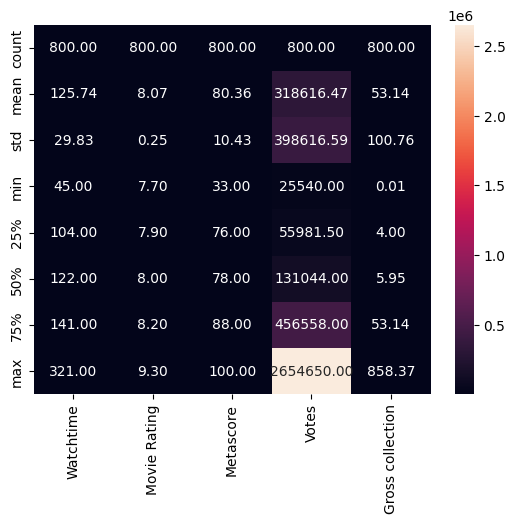

In [17]:
info = data.describe()
sns.heatmap(info,annot=True,fmt='.2f')

In [18]:
cols = x.columns
n = len(cols)
cols = cols[:n]
for i in cols:
    x[i] =  (x[i]- min(x[i]))/(max(x[i]-min(x[i])))

In [19]:
y

0       28.340
1        5.905
2      134.970
3      534.860
4      377.850
        ...   
795      4.020
796      2.120
797    115.650
798     26.240
799      0.410
Name: Gross collection, Length: 800, dtype: float64

# Visulization

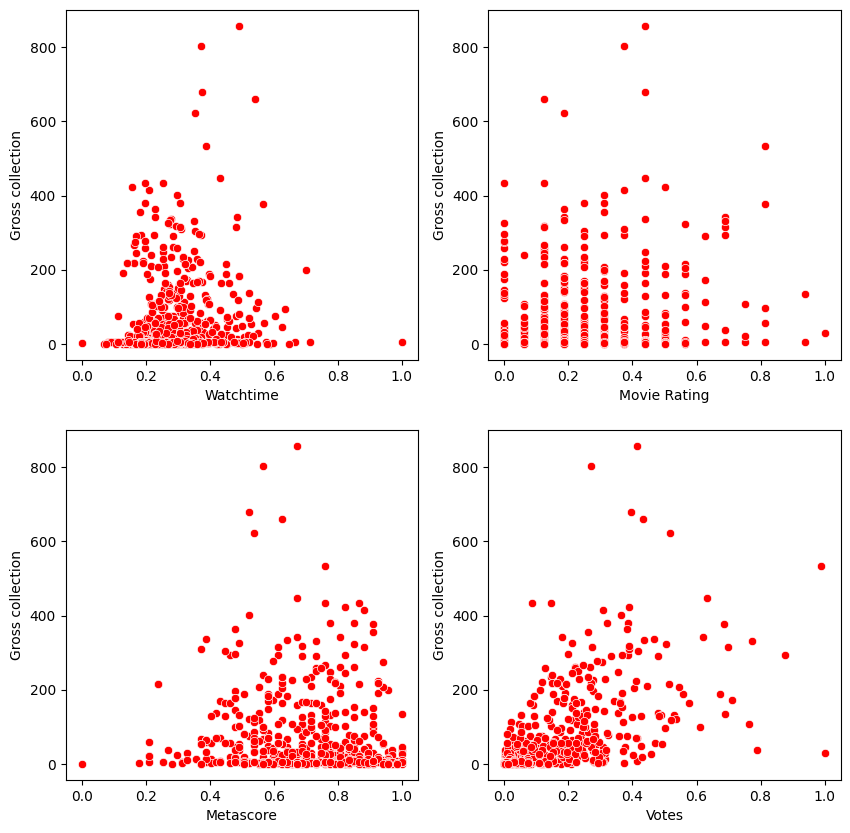

In [20]:
plt.figure(figsize=(10,10))
#df.columns
cols = x.columns
i = 0
for col in cols:
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x[col],y=y,color='red')
    i = i+1

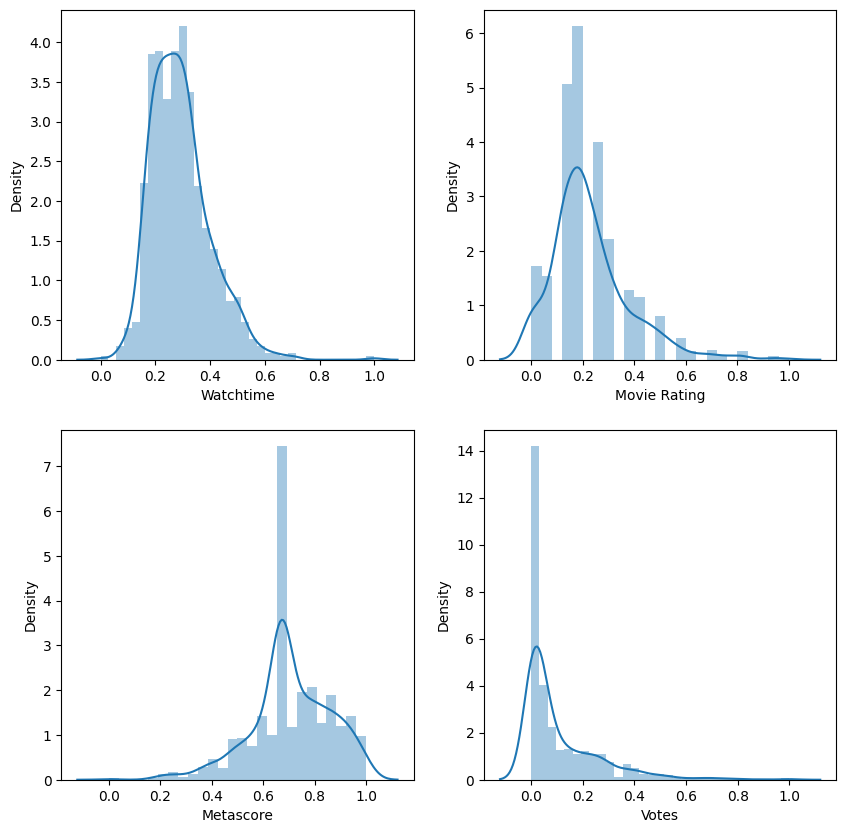

In [21]:
plt.figure(figsize=(10,10))
#df.columns
cols = x.columns
i = 0
for col in cols:
    plt.subplot(2,2,i+1)
    sns.distplot(x[col])
    i = i+1

<AxesSubplot: >

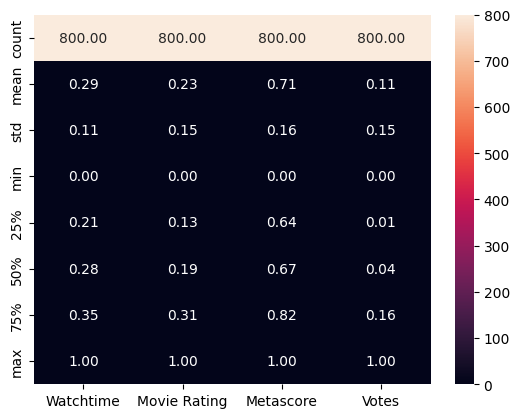

In [22]:
info = x.describe()
sns.heatmap(info,annot=True,fmt='.2f')

<AxesSubplot: >

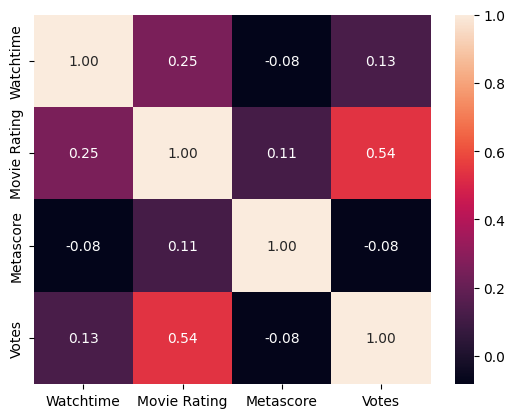

In [23]:
info = x.corr()
sns.heatmap(info,annot=True,fmt='.2f')

In [24]:
x.shape

(800, 4)

# Model Creation and Hyperparameter Tuning

In [25]:
x_train = x[:720]
y_train = y[:720]
x_test = x[721:800]
y_test = y[721:800]

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5189221334913414

In [27]:
ypred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,ypred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,ypred))
print("RMSE",(np.sqrt(mean_squared_error(y_test,ypred))))
ypred1 = ypred
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, ypred))

MAE 25.91185811993906
MSE 1582.3927782531614
RMSE 39.77930087687768
R2 score: 0.5189221334913414


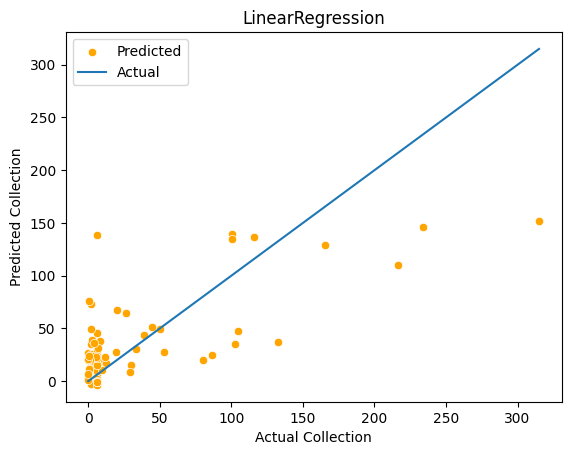

In [28]:
sns.scatterplot(x = y_test,y = ypred,color='orange',label='Predicted')
x = np.arange(0,np.max(y_test),0.1)
y = np.arange(0,np.max(y_test),0.1)
sns.lineplot(x=x,y=y,label='Actual')
plt.xlabel("Actual Collection")
plt.ylabel("Predicted Collection")
plt.title('LinearRegression')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
n_estimators=[100,200,300]
max_depth=[int(x) for x in np.linspace(10,200,50)]
#max_depth = int(max_depth)

random_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
}

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
forest_params = random_grid
clf = GridSearchCV(rfc, forest_params)
clf.fit(x_train, y_train)
clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [32]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=37, n_estimators=100)
model = model.fit(x_train,y_train)
ypred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,ypred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,ypred))
print("RMSE",(np.sqrt(mean_squared_error(y_test,ypred))))
ypred2 = ypred
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, ypred))

MAE 6.663264556962016
MSE 152.66717921683508
RMSE 12.3558560697685
R2 score: 0.9535862385920344


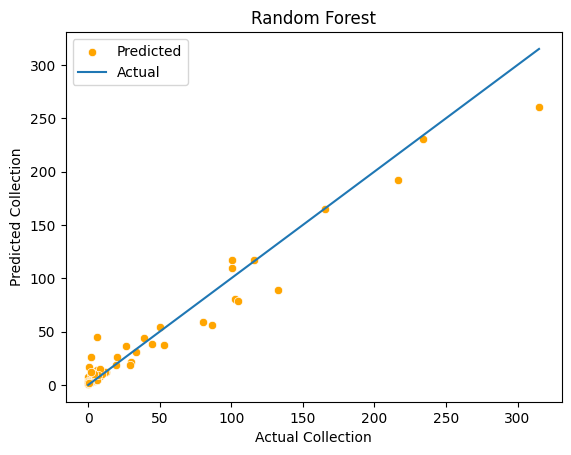

In [34]:
sns.scatterplot(x = y_test,y = ypred,color='orange',label='Predicted')
x = np.arange(0,np.max(y_test),0.1)
y = np.arange(0,np.max(y_test),0.1)
sns.lineplot(x=x,y=y,label='Actual')
plt.xlabel("Actual Collection")
plt.ylabel("Predicted Collection")
plt.title('Random Forest')
plt.show()

In [35]:
n_estimators=[100,200,300]
learning_rate=np.arange(0.1,1,0.1)
#max_depth = int(max_depth)
loss = ['square','linear']

random_grid = {
    'n_estimators':n_estimators,
    'loss':loss,
    'learning_rate':learning_rate
    
}

In [36]:
from sklearn.ensemble import AdaBoostRegressor
rfc = AdaBoostRegressor()
forest_params = random_grid
clf = GridSearchCV(rfc, forest_params)
clf.fit(x_train, y_train)
clf.best_estimator_

AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=100)

In [37]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=100)
model = model.fit(x_train,y_train)
ypred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,ypred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,ypred))
print("RMSE",(np.sqrt(mean_squared_error(y_test,ypred))))
ypred3 = ypred
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, ypred))

MAE 23.669339283421866
MSE 1806.3451646836693
RMSE 42.50111956976745
R2 score: 0.4508362968114962


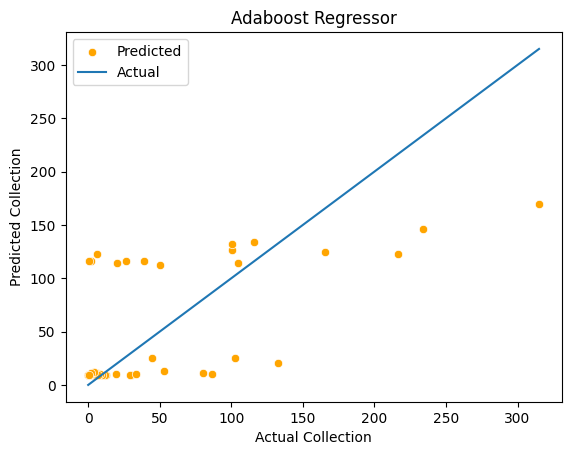

In [38]:
sns.scatterplot(x = y_test,y = ypred,color='orange',label='Predicted')
x = np.arange(0,np.max(y_test),0.1)
y = np.arange(0,np.max(y_test),0.1)
sns.lineplot(x=x,y=y,label='Actual')
plt.xlabel("Actual Collection")
plt.ylabel("Predicted Collection")
plt.title('Adaboost Regressor')
plt.show()

In [39]:
n_estimators=[100,200,300]
max_depth=[int(x) for x in np.linspace(10,200,50)]
#max_depth = int(max_depth)
learning_rate = np.arange(0.1,1,0.1)
max_leaves = np.arange(10,60,10)
random_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_leaves':max_leaves
}

In [40]:
from xgboost import XGBRegressor
rfc = XGBRegressor()
forest_params = random_grid
clf = GridSearchCV(rfc, forest_params)
clf.fit(x_train, y_train)
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=10, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [41]:
from xgboost import XGBRegressor
model = XGBRegressor(max_delta_step=0, max_depth=10, max_leaves=10, min_child_weight=1)
model = model.fit(x_train,y_train)
ypred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,ypred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,ypred))
print("RMSE",(np.sqrt(mean_squared_error(y_test,ypred))))
ypred4 = ypred
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, ypred))

MAE 0.025538244981177443
MSE 0.0018168539473420635
RMSE 0.042624569761371946
R2 score: 0.9999994476414246


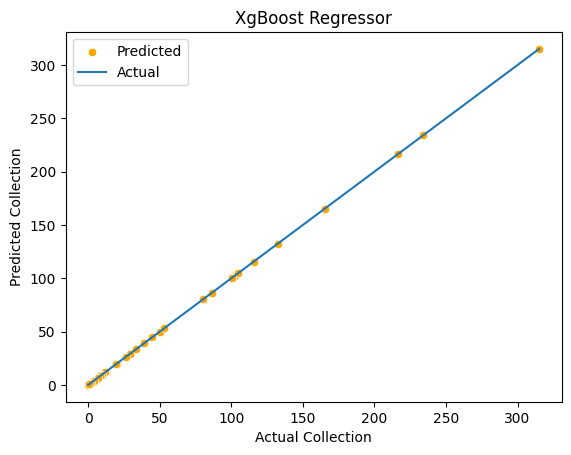

In [42]:
sns.scatterplot(x = y_test,y = ypred,color='orange',label='Predicted')
x = np.arange(0,np.max(y_test),0.1)
y = np.arange(0,np.max(y_test),0.1)
sns.lineplot(x=x,y=y,label='Actual')
plt.xlabel("Actual Collection")
plt.ylabel("Predicted Collection")
plt.title('XgBoost Regressor')
plt.show()

In [43]:
report1 = pd.DataFrame()
report1['Actual'] = y_test
report1['Predicted'] = ypred1
report1.head()

,Actual,Predicted
721,5.905,14.180358
722,20.050,67.584387
723,30.180,15.141743
724,39.200,43.931831
725,50.000,49.346910


In [44]:
report2 = pd.DataFrame()
report2['Actual'] = y_test
report2['Predicted'] = ypred2
report2.head()

,Actual,Predicted
721,5.905,5.80650
722,20.050,26.51920
723,30.180,21.49585
724,39.200,43.83675
725,50.000,54.39240


In [45]:
report3 = pd.DataFrame()
report3['Actual'] = y_test
report3['Predicted'] = ypred3
report3.head()

,Actual,Predicted
721,5.905,9.173338
722,20.050,114.219408
723,30.180,8.866310
724,39.200,116.310823
725,50.000,112.698430


In [46]:
report4 = pd.DataFrame()
report4['Actual'] = y_test
report4['Predicted'] = ypred4
report4.head()

,Actual,Predicted
721,5.905,5.907555
722,20.050,20.080938
723,30.180,30.065857
724,39.200,39.200840
725,50.000,50.003677
